In [1]:
import pandas as pd
import sklearn.metrics as met
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
#ucitavanje podataka
df = pd.read_csv("C:/Users/mira/Desktop/ipIndustija4/ipVezbe112021/primer1/dogs.csv")

#prikaz imena kolona + 5 prvih instanci
print('Prvih 5 instanci')
print(df.head())


Prvih 5 instanci
              breed  height  weight
0     Border Collie      20      45
1    Boston Terrier      16      20
2  Brittany Spaniel      18      35
3       Bullmastiff      27     120
4         Chihuahua       8       8


In [3]:
#za klasterovanje ce se koristiti atributi visina i tezina psa,
#a rasa nece biti uzeta u obzir
features = df.columns[1:]


In [4]:
#normalizacija podataka
scaler = MinMaxScaler().fit(df[features])
x = pd.DataFrame(scaler.transform(df[features]))

#dodela imena kolonama u transformisanom skupu
x.columns = features


In [5]:
#Definisanje boja koje se koriste pri crtanju instanci klastera.
#Instance jednog klastera ce biti prikazane istom bojom.
colors = ['red', 'green', 'gold', 'blue', 'black']


0.5813924452451538


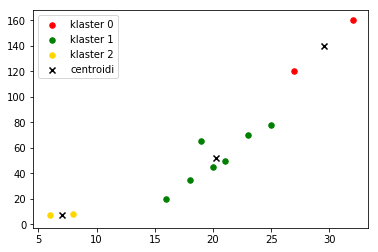

In [7]:
# primena klasterovanja
est=KMeans(n_clusters=3)
est.fit(x)
#svakoj instanci se pridruzuje oznaka klastera kome je dodeljena
df['labels']= est.labels_

#crtanje klastera
for j in range(0,3):
    
    #izdvajanje instanci klastera koji se obradjuje
    cluster= df.loc[df['labels'] == j, :]

    #crtanje instanci klastera pomocu seme sa rasprsenim elementima
    plt.scatter(cluster['height'], cluster['weight'], color=colors[j], s=30, marker='o', label="klaster {0}".format(j))

#transformacija izracunarih centroida u vrednosti originalnog skupa
centers = pd.DataFrame(scaler.inverse_transform(est.cluster_centers_), columns=features)

#crtanje crnom bojom centorida na semi sa rasprsenim elementima, na kojoj su oznaceni sa x
plt.scatter(centers['height'], centers['weight'], color='black', marker='x', label='centroidi')
t=plt.legend() #t=... je dodato da ne bi bilo ispisa iznad slike; moze samo plt.legend()

print(met.silhouette_score(x, df['labels']))

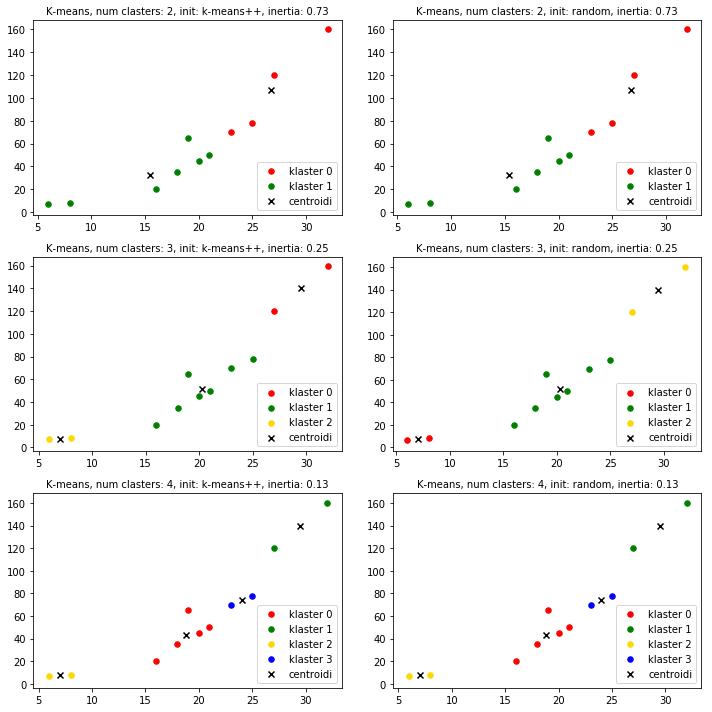

In [8]:
#pravljenje slike sa graficima i definisanje dimenzija slike
fig = plt.figure(figsize=(10,10))

#indeks dela za iscrtavanje
plt_ind=1

#primena klasterovanja za razlicit broj klastera (parametar n_clusters): 2, 3 i 4
for i in range(2,5):

    # primena i razlicite metode za inicijalizaciju centroida
    for init in ['k-means++', 'random']:

        #primena klasterovanja nad transformisanim skupom
        est=KMeans(n_clusters=i, init=init)
        est.fit(x)

        #Svakoj instanci u originalnom skupu se dodeljuje
        # oznaka klastera kome pripada.
        # Oznake klastera su u itervalu [0, i-1].
        df['labels']= est.labels_

        #Metod add_subplot(broj_redova, broj_kolona, indeks_celije_za_crtanje)
        #deli sliku na broj_redova*broj_kolona celija i omogucava zadavanje
        #celije u kojoj ce se izvrsiti naredna crtanja.
        #Celija u prvom redu i prvoj koloni ima indeks 1. Indeksi celija se
        # povecavaju po kolonama u jednom redu, a nakon poslednje celije u
        # jednom redu, prelazi se na naredni red.
        # Sa add_subplot(3, 2, plt_ind) slika se deli na 3 reda i svaki od
        # njih na 2 kolone.
        #   x x 
        #   x x 
        #   x x 

        # indeksi po celijama su
        #   1 2 
        #   3 4 
        #   5 6 

        fig.add_subplot(3, 2, plt_ind)

        #Svakom klasteru (oznake klastera su u intervalu [0, i-1]) se dodeljuje jedinstvena
        #boja. Instance jednog klastera se crtaju pomocu seme sa rasprsenim elementima i
        #boje se bojom koja je dodeljena njihovom klasteru. Na x osi se predstavlja prava
        #visina psa, a na y osi prava tezina psa. Instance su predstavljene kao tacke.
        for j in range(0,i):

            #izdvajanje instanci klastera koji se obradjuje
            cluster= df.loc[df['labels'] == j, :]

            #crtanje instanci klastera pomocu seme sa rasprsenim elementima
            plt.scatter(cluster['height'], cluster['weight'], color=colors[j], s=30, marker='o', label="klaster %d"%j)

        #transformacija izracunarih centroida u vrednosti originalnog skupa
        centers = pd.DataFrame(scaler.inverse_transform(est.cluster_centers_), columns=features)

        #crtanje crnom bojom centorida na semi sa rasprsenim elementima, na kojoj su oznaceni sa x
        plt.scatter(centers['height'], centers['weight'], color='black', marker='x', label='centroidi')

        #postavljanje legende i naslova (koji sadrzi parametre klasterovanja i SSE) za svaku celiju
        plt.legend(loc='lower right')
        plt.title('K-means, num clasters: %d, init: %s, inertia: %.2f' % (i, init,  est.inertia_), fontsize=10)

        #prelazak u narednu celiju u kojoj ce se prikazati
        #rezultat klasterovanja sa novim parametrima
        plt_ind+=1
#prikaz slike bez poklapanja celija
plt.tight_layout()
plt.show()

